In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

In [3]:
from huggingface_hub import notebook_login
notebook_login()

In [4]:
from datasets import load_dataset
import os

# Charger le dataset Hugging Face (nécessite d'être authentifié)
dataset = load_dataset("bigscience-data/roots_fr_wikipedia", split="train")

# Créer le répertoire "data" s'il n'existe pas
os.makedirs("../../data", exist_ok=True)

# Sauvegarde du texte des articles
output_file = "/content/drive/MyDrive/data/wikipedia_fr.txt"

with open(output_file, "w", encoding="utf-8") as f:
    for article in dataset:
        text = article.get("text", "").strip()  # Récupère le texte propre
        if text:  # Évite les textes vides
            f.write(text + "\n\n")  # Ajoute un saut de ligne entre articles

print(f"✅ Dataset sauvegardé dans {output_file}")


dataset_infos.json:   0%|          | 0.00/922 [00:00<?, ?B/s]

train-00000-of-00007.parquet:   0%|          | 0.00/263M [00:00<?, ?B/s]

train-00001-of-00007.parquet:   0%|          | 0.00/265M [00:00<?, ?B/s]

train-00002-of-00007.parquet:   0%|          | 0.00/265M [00:00<?, ?B/s]

train-00003-of-00007.parquet:   0%|          | 0.00/265M [00:00<?, ?B/s]

train-00004-of-00007.parquet:   0%|          | 0.00/264M [00:00<?, ?B/s]

train-00005-of-00007.parquet:   0%|          | 0.00/263M [00:00<?, ?B/s]

train-00006-of-00007.parquet:   0%|          | 0.00/263M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/683756 [00:00<?, ? examples/s]

✅ Dataset sauvegardé dans /content/drive/MyDrive/data/wikipedia_fr.txt


In [5]:
import re

# Charger le texte
input_file = "/content/drive/MyDrive/data/wikipedia_fr.txt"
output_file = "/content/drive/MyDrive/data/wikipedia_clean.txt"

with open(input_file, "r", encoding="utf-8") as f:
    text = f.readlines()


In [6]:
# Fonction de nettoyage du texte
def clean_text(text):
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r"\s+", " ", text)  # Supprimer espaces multiples
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ ]", "", text)  # Garder lettres et accents
    return text.strip()

# Nettoyer chaque ligne
cleaned_text = [clean_text(line) for line in text if line.strip()]

# Sauvegarde
with open(output_file, "w", encoding="utf-8") as f:
    f.write("\n".join(cleaned_text))

print(f"✅ Texte nettoyé et sauvegardé dans {output_file}")

✅ Texte nettoyé et sauvegardé dans /content/drive/MyDrive/data/wikipedia_clean.txt


In [7]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Charger le texte nettoyé
input_file = "/content/drive/MyDrive/data/wikipedia_clean.txt"

with open(input_file, "r", encoding="utf-8") as f:
    sentences = [simple_preprocess(line) for line in f]

# Entraîner Word2Vec (Skip-gram) avec plusieurs workers
model = Word2Vec(sentences=sentences, vector_size=200, window=5, min_count=5, sg=1, workers=8)

# Sauvegarde du modèle
model.save("/content/drive/MyDrive/data/word2vec_fr.model")

print("✅ Modèle entraîné et sauvegardé !")


✅ Modèle entraîné et sauvegardé !


In [2]:
from gensim.models import Word2Vec

# Charger le modèle
model = Word2Vec.load("/content/drive/MyDrive/data/word2vec_fr.model")

# Tester les mots les plus proches
print(model.wv.most_similar("cheval"))
print(model.wv.most_similar(positive=["roi", "femme"], negative=["homme"]))


[('cavalier', 0.7781837582588196), ('selle', 0.7200576066970825), ('destrier', 0.7179110050201416), ('bât', 0.7027671933174133), ('poney', 0.7026054263114929), ('navarrin', 0.7015456557273865), ('chevaux', 0.7011531591415405), ('chameau', 0.6874880194664001), ('hennissant', 0.6854763627052307), ('âne', 0.6778074502944946)]
[('reine', 0.7075038552284241), ('reinemère', 0.6742799282073975), ('sancie', 0.662137508392334), ('régente', 0.6501508951187134), ('sancia', 0.6353825330734253), ('ingeburge', 0.6251856088638306), ('leszczynska', 0.6170158982276917), ('répudiée', 0.616165041923523), ('princesse', 0.6146767735481262), ('victoriaeugénie', 0.6137959957122803)]


In [2]:
import numpy as np

# Récupérer la liste des mots du vocabulaire
words = list(model.wv.index_to_key)

# Extraire les vecteurs correspondants
word_vectors = np.array([model.wv[word] for word in words])

In [9]:
word_vectors.shape

(670366, 200)

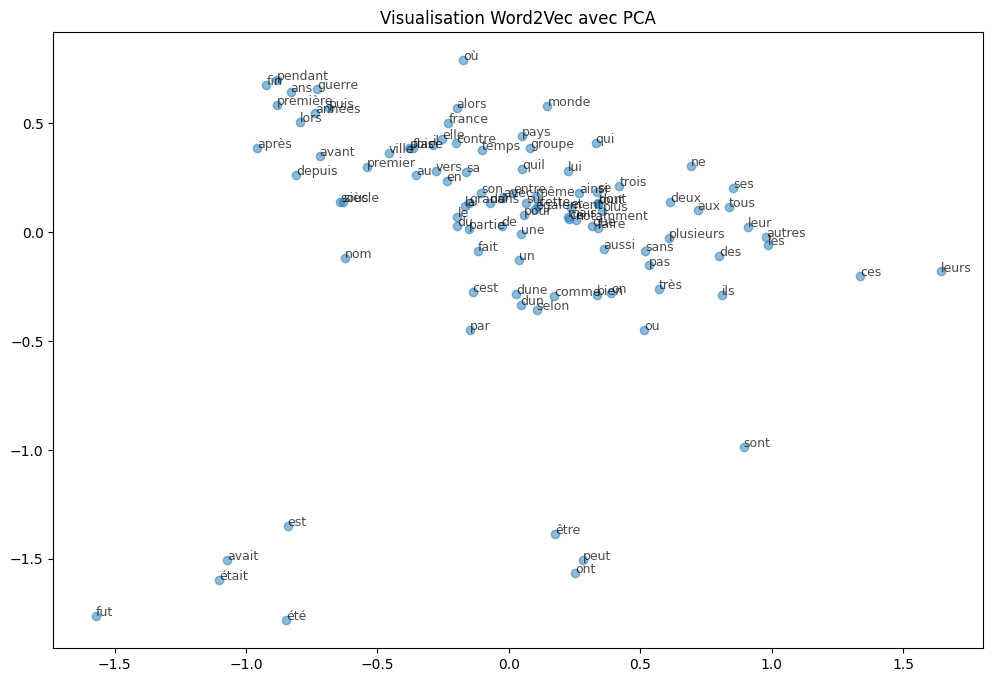

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire à 2 dimensions avec PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors[:100])  # On prend les 300 premiers mots

# Tracer le graphique
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], alpha=0.5)

# Ajouter les étiquettes des mots
for i, word in enumerate(words[:100]):
    plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]), fontsize=9, alpha=0.7)

plt.title("Visualisation Word2Vec avec PCA")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


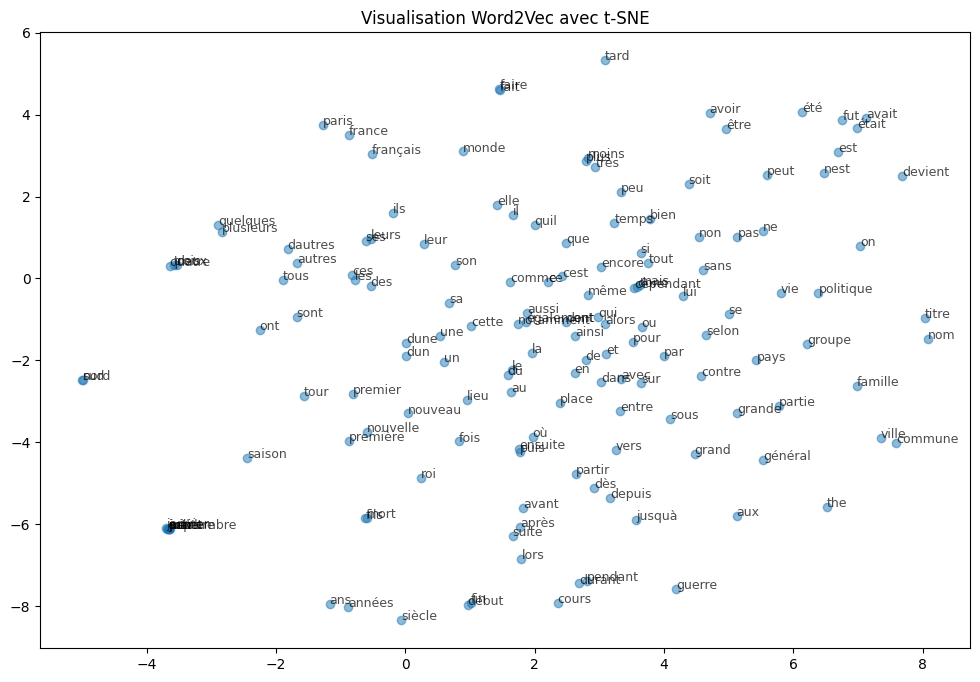

In [13]:
from sklearn.manifold import TSNE
# Réduire à 2D avec t-SNE (lent sur un grand vocabulaire)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=5000)
word_vectors_tsne = tsne.fit_transform(word_vectors[:150])  # On prend les 300 premiers mots

# Tracer le graphique
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], alpha=0.5)

# Ajouter les étiquettes des mots
for i, word in enumerate(words[:150]):
    plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=9, alpha=0.7)

plt.title("Visualisation Word2Vec avec t-SNE")
plt.show()
